# Выявление профилей потребления

Заказчиком выступает интернет-магазин товаров для дома "Пока все ещё тут". В последнее время они испытывают проблемы и хотят понять в каком направлении стоит развиваться и какие проблемы необходимо решить для этого. 

Среди **задач** можно выделить:
- проведение исследовательского анализа данных;
- сегментация покупателей на основе информации об их покупках;
- анализ выделенных сегментов пользователей;
- формулирование и проверка статистических гипотез.

**Оглавление**
* [[Декомпозиция](#p1)](#section_id)<a id='section_id1'></a>
* [[Открытие файла и изучение общей информации](#p2)](#section_id)<a id='section_id2'></a>
* [[Предобработка данных](#p3)](#section_id)<a id='section_id3'></a>
* [[Исследовательский анализ данных](#p4)](#section_id)<a id='section_id4'></a>
* [[Сегментация пользователей и дальнейший анализ](#p5)](#section_id)<a id='section_id5'></a>
* [[Статистический анализ гипотез](#p6)](#section_id)<a id='section_id6'></a>
* [[Выводы](#p7)](#section_id)<a id='section_id7'></a>
* [[Рекомендации](#p8)](#section_id)<a id='section_id8'></a>

<a id='p1'></a>
### [Декомпозиция](#section_id1)

**Предобработка данных**
- проверить соответствие типов значений в столбцах;
- проверить пропуски в данных;
- проверить дубликаты;
- проверить выбросы в данных;
- при необходимости скорректировать все вышеперечисленное;
- добавить дополнительные столбцы с информацией о стоимости товара в заказе и категорией товара.

**Исследовательский анализ данных**
- выявить динамику выручки по месяцам (возможно, по дням недели);
- рассчитать средний чек (AOV) и посмотреть его динамику по месяцам;
- рассчитать среднюю выручку с покупателя (ARPU) и посмотреть ее динамику по месяцам;
- рассчитать сезонность товаров и построить ее динамику по месяцам;
- рассчитать сезонность категорий и построить ее динамику по месяцам.

**Сементация пользователей и дальнейший анализ**
- осуществить сегментацию пользователей с помощью RFM-анализа;
- для каждого сегмента выявить категории товаров, приносящих максимальный доход и визуализировать результат;
- для каждого сегмента выявить категории товаров, пользующихся максимальным спросом и визуализировать результат;
- для каждого сегмента выявить сезонность покупок и визуализировать результат.

**Статистический анализ гипотез**
- 1 гипотеза: у оптовых и розничных покупателей разная частота заказов;
- проверка 1 гипотезы;
- 2 гипотеза: у оптовых и розничных покупателей разная частота заказов;
- проверка 2 гипотезы;
- 3 гипотеза: разные категории покупателей имеют разную сезонность покупок категорий товаров;
- проверка 3 гипотезы.

**Выводы**
- краткие выводы по каждому этапу исследования;
- общие рекомендации.

<a id='p2'></a>
### [Открытие файла и изучение общей информации](#section_id2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import re
import plotly.express as px
import warnings 

In [2]:
# отключение предупреждений об ошибках
warnings.filterwarnings('ignore')

# снятие ограничений ширины столбцов выводимых таблиц
pd.set_option('display.max.colwidth', None)

In [3]:
try:
    orders = pd.read_csv('https://code.s3.yandex.net//datasets/ecommerce_dataset.csv')
except:
    orders = pd.read_csv(r'C:\Users\spk-s\Desktop\Диплом\Основной\ecommerce_dataset.csv')

In [4]:
# общий вид датасета
orders.sample(10)

,date,customer_id,order_id,product,quantity,price
5326,2019061507,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0
6715,2019102915,cdaf413b-09ae-48c0-8cfa-5cd6b71948c6,73131,Пеларгония розебудная Red Pandora укорененный черенок,1,149.0
141,2018100815,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0
3365,2019050216,760aa067-90c3-4794-b7a9-a8831197388b,14715,Пеларгония зональная Мультиблум Скарлет Ай d-7 см h-10 см укорененный черенок,1,75.0
2381,2019031816,54417722-4dc6-40b3-bc5a-f71fc905583e,14578,Цикламен комнатный D15 см H20 см розовый с белым,1,195.0
278,2018101711,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,Щетка для посуды *Мила* SV3182 1807009,50,27.0
3512,2019051019,494d68a8-d133-4622-89a1-7743e142f8c1,71392,Искусственный цветок Букет Примулы пластиковая красная,4,52.0
2683,2019040512,cca3f0b3-fede-4ece-8b0e-096175e5a54a,14619,Лилейник высокорослый смесь окрасок объем 1 л,2,202.0
397,2018102409,67c1705b-597d-4d06-ab3b-7fd7c3038198,68736,"Сушилка для белья потолочная ЛИАНА ЛЮКС 140, ЛДН-Т",1,449.0
4638,2019060514,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0


In [5]:
# общая информация о датасете
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В предоставленном датасете, состоящем из 6737 строк, приведены данные о дате и идентификаторе заказа, идентификаторе покупателя, а также названии, количестве и цене товаров.
<br>Все столбцы, кроме даты заказа имеют соответствующий содержащимся данным тип. 
<br>Пропусков не обнаружено.

<a id='p3'></a>
### [Предобработка данных](#section_id3)
* [Обработка типов данных в столбцах](#p3s1) 
* [Обработка дубликатов](#p3s2)
* [Добавление столбцов](#p3s3)
* [Обработка аномальных значений](#p3s4)

<a id='p3s1'></a>
#### Обработка типов данных в столбцах

In [6]:
# изменение типа данных в столбце с датой заказа
orders['date'] = pd.to_datetime(orders['date'], format = '%Y%m%d%H').dt.date
orders.sample(3)

,date,customer_id,order_id,product,quantity,price
3252,2019-04-28,b6da6f7a-d2a3-424a-878e-1876c8b88126,14700,Рассада Дыни сорт Эфиопка горшок 9х9 см P-9,3,38.0
5676,2019-07-05,7e53225d-2df9-4484-95a5-3c73c6084a6c,14892,Аквилегия обыкновенная Барлоу микс объем 1 л,1,105.0
1839,2019-02-15,f5afedc6-884f-4da5-9f00-c4f608dfba33,70282,"Гладильная доска НИКА БЕЛЛЬ Классик 2 122х34,5 см БК2",1,787.0


<a id='p3s2'></a>
#### Обработка дубликатов

In [7]:
# проверка явных дубликатов
orders['product'] = orders['product'].str.lower()
orders['product'] = orders['product'].str.replace('ё', 'е')

dup = orders.duplicated().sum()
print(f'Выявлено {dup} явных дубликатов.')

Выявлено 966 явных дубликатов.


In [8]:
# проверка неявных дубликатов
dupl = orders.duplicated(subset=['customer_id', 'order_id', 'product']).sum()
print(f'Выявлено {dupl} неявных дубликатов.')

Выявлено 1886 неявных дубликатов.


In [9]:
# удаление неявных дубликатов
orders = orders.drop_duplicates(subset=['customer_id', 'order_id', 'product'], keep='first').reset_index(drop=True)

dupl = orders.duplicated(subset=['customer_id', 'order_id', 'product']).sum()
dup = orders.duplicated().sum()
print(f'После очистки осталось {dupl} неявных дубликатов.')
print(f'После очистки осталось {dup} явных дубликатов.')

После очистки осталось 0 неявных дубликатов.
После очистки осталось 0 явных дубликатов.


В ходе проверки было обнаружено 966 явных и 1886 неявных дубликатов. Эти дубликаты идентичны между собой по всем столбцам, кроме даты, значит, вероятнее всего, заказчик делал выгрузку с разных источников и некоторые заказы задублировались, но время проставилось по-разному. Для корректности дальнейшего исследования, дубликаты были удалены.

<a id='p3s3'></a>
#### Добавление столбцов

In [10]:
# добавление столбца со стоимостью товара
orders['cost'] = orders['quantity'] * orders['price']

In [11]:
# добавление столбца с месяцем заказа
orders.insert(1, 'month', pd.to_datetime(orders['date']).dt.strftime('%Y-%m'))

In [12]:
# создание столбца с названием товара
orders['name'] = orders['product']
for i in range(len(orders["product"].str.split(" "))):
    orders['name'][i] = ' '.join(orders["product"].str.split(" ")[i][:1])

# разбиение названий товаров на списки категорий
house = ['автоматическая', 'бак', 'бельевые', 'бензин', 'ваза', 'вакуумный', 'вантуз', 'ведро', 'веник', \
         'вешалка', 'вешалка-перекладина', 'вешалка-плечики', 'вешалка-стойка', \
         'вешалка-сушилка', 'вешалки', 'вкладыши', 'губка', 'декоративная', 'держатель', 'дозатор', 'доска', \
         'емкость', 'ерш', 'жестяная', 'завертка', 'запасная', 'защитная', 'защитный', 'измерительный', \
         'ключница', 'комплект', 'контейнер', 'корзина', 'корзинка', 'коробка', 'корыто', 'котел', 'крышка', \
         'крючок', 'лопатка', 'лоток', 'мешок', 'многофункциональный', 'модульная', 'мусорный', 'мыльница', \
         'насадка', 'насадка-моп', 'насадка-отжим', 'настенная', 'настольная', 'новогоднее', 'обувница-3', \
         'ополаскиватель', 'основание', 'отжим', 'плечики', 'подарочный', 'подвесное', 'подголовник', 'подкладка', \
         'подрукавник', 'подставка', 'покрытие', 'прищепки', 'пробка', 'пьезозажигалка', 'ролик', 'ручка', 'сетка', \
         'сиденье', 'складная', 'складной', 'сменная', 'сменный', 'сметка', 'совок', 'средство', 'сумка', \
         'сумка-тележка', 'сушилка', 'таз', 'тележка', 'тряпка', 'тряпкодержатель', 'урна', 'урна-пепельница', 'фиксатор-шар', \
         'холодная', 'чехол', 'чистящий', 'швабра', 'штанга', 'щетка', 'щетка-сметка', 'щетка-утюжок', \
         'этажерка', 'ящик', 'антижир', 'антинакипин', 'ароматизированное', \
         'гипоаллергенный', 'жидкое', 'зубная', 'кондиционер', 'ополаскиватель', 'чистящий', 'стиральный', \
         'увлажняющая', 'отбеливатель', 'концентрат', 'мыло', 'мыло-скраб']

kitchen = ['tepмокружка', 'бидон', 'блюдо', 'блюдце', 'бульонница', 'венчик', 'картофелемялка', 'кастрюля', \
           'кипятильник', 'кисточка', 'ковш', 'кофе', 'кружка', 'кувшин', 'кухонное', 'кухонные', 'мантоварка', \
           'мантоварка-пароварка', 'масленка', 'мерный', 'миксер', 'мини-сковорода', 'миска', 'нож', 'ножеточка', \
           'овощеварка', 'овощечистка', 'орехоколка', 'отделитель', 'половник', 'пресс', 'просеиватель', 'противень', \
           'разделочная', 'рассекатель', 'рукав', 'рыбочистка', 'салатник', 'салфетка', 'салфетница', 'сахарница', \
           'сервировочная', 'сито', 'скалка', 'сковорода', 'соковарка', 'соковыжималка', 'сотейник', 'стакан', \
           'стеклянная', 'столовая', 'столовый', 'тарелка', 'терка', 'термокружка', 'термометр', 'термос', \
           'термостакан', 'толкушка', 'тортница', 'универсальный', 'фарфоровая', 'форма', 'хлебница', 'чайная', \
           'чайник', 'чайный', 'шприц', 'электроштопор', 'вилка', 'ложка']

build = ['сверло', 'сверло-фреза,', 'стремянка', 'стремянка-табурет', 'стремянки', 'универсальное', 'шило', \
           'штангенциркуль', 'шпингалет', 'стяжки', 'стяжка', 'стеллаж', 'пружина', 'шнур', 'шпагат', 'утюг', 'фен', \
           'уголок', 'скребок', 'светильник', 'ручка-скоба', 'решетка', 'пылесос', 'полка', 'полки', 'петля-стрела', \
           'перчатки', 'петля', 'паста', 'пена', 'окномойка', 'кофр', 'крепеж', 'весы', 'веревка', 'ванна', 'гладильная', \
           'измельчитель', 'карниз', 'кольца', 'лестница', 'лестница-стремянка', 'линейка,', 'короб', 'набор']

decor = ['готовая', 'двуспальное', 'наволочка', 'наматрасник', 'наматрацник', 'наматрицник-чехол', 'нетканые', 'одеяло', \
         'плед', 'пододеяльник', 'подушка', 'покрывало', 'полотенце', 'простынь', 'простыня', 'скатерть', 'ткань', 'халат', \
         'штора', 'искусственная', 'искусственный', 'муляж', 'фоторамка', 'ковер', 'коврик', 'комод']

plants = ['агератум', 'адиантум', 'азалия', 'аквилегия', 'алиссум', 'алоэ', 'альбука', 'амариллис', 'анемона', 'антуриум', \
          'аптения', 'арбуз', 'аргирантерум', 'артемизия', 'аспарагус', 'астра', 'афеляндра', 'бадан', 'базилик', 'баклажан', \
          'бакопа', 'бальзам', 'бальзамин', 'банка', 'барвинок', 'бархатцы', 'бегония', 'буддлея', 'бузульник', 'валериана', \
          'вербейник', 'вербена', 'вероника', 'вигна', 'виола', 'газания', 'гайлардия', 'гардения', 'гвоздика', 'георгина', \
          'герань', 'гербера', 'гиацинт', 'гимнокалициум', 'гиностемма', 'гипсофила', 'глоксиния', 'годеция', 'горох', \
          'гортензия', 'девичий', 'декабрист', 'дендробиум', 'джункус', 'диффенбахия', 'драцена', 'душица', 'дыня', 'ель', \
          'замиокулькас', 'зверобой', 'земляника', 'змееголовник', 'импатиенс', 'иссоп', 'кабачок', 'каланхое', 'калатея', \
          'календула', 'калибрахоа', 'калла', 'каллуна', 'калоцефалус', 'камнеломка', 'кампанула', 'капсикум', 'капуста', \
          'кипарисовик', 'клен', 'клубника', 'кодонанта', 'колеус', 'колокольчик', 'комнатное', 'кореопсис', 'кориандр', \
          'космея', 'котовник', 'крассула', 'крокусы', 'лаванда', 'лаватера', 'лавр', 'лантана', 'лапчатка', 'левкой', \
          'лен', 'лилейник', 'литопс', 'лобелия', 'лук', 'львиный', 'любисток', 'маттиола', 'махровое', 'махровый', \
          'мединилла', 'мелисса', 'мимоза', 'мирт', 'многолетнее', 'молодило', 'монарда', 'морковь', 'муррайя', 'мускари', \
          'мята', 'настурция', 'незабудка', 'нефролепис', 'нивянник', 'нолина', 'овсянница', 'огурец', 'однолетнее', 'осина', \
          'папоротник', 'патиссон', 'пахира', 'пеларгония', 'пеперомия', 'петрушка', 'петуния', 'пиретрум', 'платикодон', \
          'подсолнечник', 'портулак', 'примула', 'пряные', 'пуансетия', 'пуансеттия', 'радермахера', 'ранункулус', 'рассада', \
          'роза', 'розмарин', 'рудбекия', 'салат', 'сальвия', 'сантолина', 'седум', 'сельдерей', 'синнингия', 'скиммия', \
          'смолевка', 'соланум', 'солидаго', 'спатифиллум', 'суккулент', 'сциндапсус', 'табак', 'тагетис', 'тимьян', 'томат', \
          'томата', 'тыква', 'тюльпан', 'укроп', 'фал', 'фаленопсис', 'фатсия', 'фиалка', 'физостегия', 'фикус', 'фиттония', \
          'флокс', 'фуксия', 'хамедорея', 'хлорофитум', 'хоста', 'хризантема', 'хризолидокарпус', 'цветок', 'цветущее', \
          'целозия', 'цикламен,', 'цикламен', 'цинерания', 'цинерария', 'циния', 'цинния', 'циперус', 'цитрофортунелла', \
          'чабер', 'шалфей', 'шеффлера', 'эвкалипт', 'энотера', 'эпипремнум', 'эхеверия', 'эхинацея', 'эхинокактус', \
          'эшшольция', 'юкка', 'ясколка']

In [13]:
# добавление столбца с категориями товаров
def f(row):
    val = 0
    if row['name'] in house:
        val = 'Хозтовары'
    elif row['name'] in kitchen:
        val = 'Кухонные принадлежности'
    elif row['name'] in build:
        val = 'Стройматериалы и бытовая техника'
    elif row['name'] in decor:
        val = 'Декор и текстиль'
    elif row['name'] in plants:
        val = 'Растения и рассада'
    return val

orders['products_category'] = orders.apply(f, axis=1)
orders = orders.drop('name', axis=1)

orders.sample(3)

,date,month,customer_id,order_id,product,quantity,price,cost,products_category
763,2018-11-20,2018-11,d0bd3cb4-d63b-4f71-9a56-8ffaa6e5f090,69065,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, ярко красная, махровая",1,149.0,149.0,Растения и рассада
630,2018-11-10,2018-11,d5e3fb18-e36f-49a2-98e6-af8ae1a3d5b8,68940,терка webber из нержавеющей стали ве-054 6 граней 21 см,1,239.0,239.0,Кухонные принадлежности
802,2018-11-23,2018-11,81a07ad7-0646-477c-9e11-0a52c6f6f7e1,69090,мимоза стыдливая d-9 см,1,314.0,314.0,Растения и рассада


Для удобства представления результатов добавлены столбцы с месяцем и годом заказа, стоимостью и категориями товаров. <br>Товары разделены на категории: хозтовары, кухонные принадлежности, стройматериалы и бытовая техника, декор и текстиль, растения и рассада.

<a id='p3s4'></a>
#### Обработка аномальных значений

***Столбец с идентификатором заказа***

In [21]:
# удаление из датасета заказов с несколькими идентификаторами пользователей
dubl_user = orders.pivot_table(index='order_id', values='customer_id', aggfunc='nunique').reset_index() \
                                                                             .sort_values(by='customer_id', ascending=False) \
                                                                             .query('customer_id > 1')
delete = dubl_user['order_id'].to_list()
orders = orders.query('~(order_id in @delete)').reset_index(drop=True)

print(f'В датасете выявлено и удалено {len(delete)} строк, соответствующих идентификаторам заказов, оформленных на нескольких покупателей.')

В датасете выявлено и удалено 0 строк, соответствующих идентификаторам заказов, оформленных на нескольких покупателей.


***Столбцы с ценой и количеством товара в заказе***

In [22]:
# общая информация о данных в столбцах
orders[['price', 'quantity']].describe().round()

,price,quantity
count,4783.0,4783.0
mean,513.0,3.0
std,925.0,10.0
min,9.0,1.0
25%,90.0,1.0
50%,150.0,1.0
75%,488.0,1.0
max,8737.0,334.0


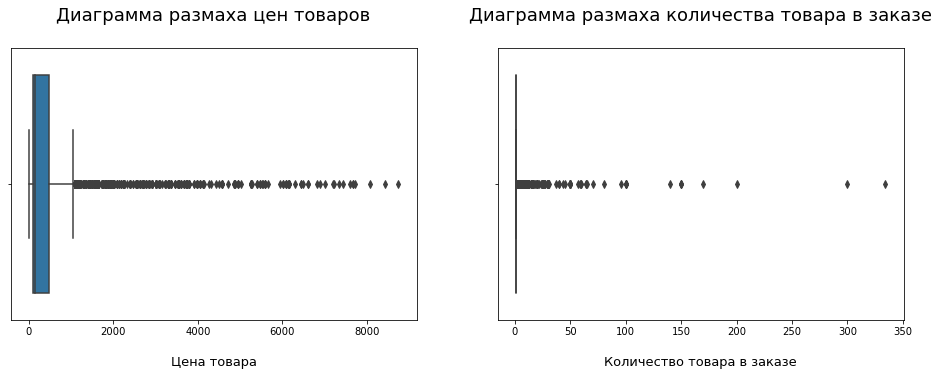

In [23]:
# диаграмма размаха цен и количества товара

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(orders['price'], ax=ax[0])
sns.boxplot(orders['quantity'], ax=ax[1])

ax[0].set_xlabel("\n" + 'Цена товара', fontsize=13)
ax[0].set_title('Диаграмма размаха цен товаров' + "\n", fontsize=18)

ax[1].set_xlabel("\n" + 'Количество товара в заказе', fontsize=13)
ax[1].set_title('Диаграмма размаха количества товара в заказе' + "\n", fontsize=18)
fig.show();

In [24]:
# исключение товара с аномальной ценой из датасета
orders = orders.query('price < 9000').reset_index(drop=True)

# исключение товара с аномальным количеством позиций одного товара в заказе
orders = orders.query('quantity < 400').reset_index(drop=True)

В рамках данного исследования, товар с ценой 14917 рублей можно считать выбросом, т. к. он сильно выбивается из общей массы и может вносить погрешность в дальнейшие расчеты. Пренебрежем им и исключим из датасета.
<br>Видно, что заказ, в котором 1000 позиций одного товара, является аномалией по отношению к остальным товарам. Исключим его из исследования, чтобы исключить внесение им погрешностей.

<a id='p4'></a>
### [Исследовательский анализ данных](#section_id4)
* [Динамика выручки по месяцам](#p4s1) 
* [Динамика среднего чека по месяцам (AOV)](#p4s2)
* [Динамика средней выручки с покупателя (ARPU)](#p4s3)
* [Выявление сезонности топ-10 товаров, приносящих наибольшую прибыль](#p4s4)
* [Расчет сезонности для категорий товаров](#p4s5)

In [25]:
# вывод временного интервала представленных данных
print(f'В датасете представлены данные на период с {orders.date.min()} по {orders.date.max()}.')

В датасете представлены данные на период с 2018-10-01 по 2019-10-31.


<a id='p4s1'></a>
#### Динамика выручки по месяцам

In [26]:
# таблица выручки по месяцам
revenue = orders.pivot_table(index='month', values='cost', aggfunc='sum').reset_index() \
                                                               .rename(columns={'month': 'Месяц', 'cost': 'Выручка'})
revenue

,Месяц,Выручка
0,2018-10,351162.0
1,2018-11,359348.0
2,2018-12,345921.0
3,2019-01,230097.0
4,2019-02,305183.0
5,2019-03,249429.0
6,2019-04,316469.0
7,2019-05,233874.0
8,2019-06,225116.0
9,2019-07,220015.0


In [27]:
# график динамики выручки по месяцам
fig = px.bar(revenue, x='Месяц', y='Выручка', color='Месяц',
             title = 'Динамика выручки по месяцам',
             text = 'Выручка',
             color_discrete_sequence=[px.colors.qualitative.Set3[9], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[4], \
                                     px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[10], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[11], \
                                     px.colors.qualitative.Set3[1], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[3], px.colors.qualitative.Set2[3]])
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category')
fig.show()

По графику видно, что с января 2019 года выручка магазина резко сократилась в 1,5 раза, но в феврале и апреле наблюдаются скачки. Скорей всего это связано с сезонностью покупок продаваемых товаров. Далее попробуем дать объяснение этому.

<a id='p4s2'></a>
#### Динамика среднего чека по месяцам (AOV)

In [28]:
# таблица выручки, количества заказов и среднего чека по месяцам
check = orders.pivot_table(index='month', values=['order_id', 'cost'], aggfunc={'order_id': 'nunique', 'cost': 'sum'}) \
              .reset_index() \
              .rename(columns={'month': 'Месяц', 'cost': 'Выручка', 'order_id': 'Количество заказов'})
check['Средний чек'] = round(check['Выручка'] / check['Количество заказов'], 0)
check

,Месяц,Выручка,Количество заказов,Средний чек
0,2018-10,351162.0,238,1475.0
1,2018-11,359348.0,204,1762.0
2,2018-12,345921.0,278,1244.0
3,2019-01,230097.0,165,1395.0
4,2019-02,305183.0,286,1067.0
5,2019-03,249429.0,242,1031.0
6,2019-04,316469.0,264,1199.0
7,2019-05,233874.0,178,1314.0
8,2019-06,225116.0,156,1443.0
9,2019-07,220015.0,197,1117.0


In [29]:
# график динамики среднего чека по месяцам
fig = px.bar(check, x='Месяц', y='Средний чек', color='Месяц',
             title = 'Динамика среднего чека по месяцам',
             text = 'Средний чек',
             color_discrete_sequence=[px.colors.qualitative.Set3[9], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[4], \
                                     px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[10], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[11], \
                                     px.colors.qualitative.Set3[1], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[3], px.colors.qualitative.Set2[3]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category')
fig.show()

Максимальный средний чек, как и выручка, был в ноябре 2018 года. В то время, как в октябре, декабре и апреле (остальных лидерах по выручке) средний чек не такой высокий. Это говорит о том, что в эти месяцы было больше количество покупок, нежели в ноябре, а выручку они принесли в итоге такую же. <br>Здесь одним из лидеров является июнь, не смотря на низкую (относительно) выручку, значит, что имело место меньшее количество заказов на большие суммы.

<a id='p4s3'></a>
#### Динамика средней выручки с покупателя (ARPU)

In [35]:
# таблица выручки, количества покупателей и средней выручки с покупателя по месяцам
avg_revenue = orders.pivot_table(index='month', values=['customer_id', 'cost'], \
                                 aggfunc={'customer_id': 'nunique', 'cost': 'sum'}) \
                    .reset_index() \
                    .rename(columns={'month': 'Месяц', 'cost': 'Выручка', 'customer_id': 'Количество клиентов'})
avg_revenue['ARPU'] = round(avg_revenue['Выручка'] / avg_revenue['Количество клиентов'], 0)
avg_revenue

,Месяц,Выручка,Количество клиентов,ARPU
0,2018-10,351162.0,179,1962.0
1,2018-11,359348.0,178,2019.0
2,2018-12,345921.0,228,1517.0
3,2019-01,230097.0,149,1544.0
4,2019-02,305183.0,244,1251.0
5,2019-03,249429.0,227,1099.0
6,2019-04,316469.0,235,1347.0
7,2019-05,233874.0,164,1426.0
8,2019-06,225116.0,147,1531.0
9,2019-07,220015.0,185,1189.0


In [36]:
# график динамики средней выручки с покупателя по месяцам
fig = px.bar(avg_revenue, x='Месяц', y='ARPU', color='Месяц',
             title = 'Динамика средней выручки с покупателя по месяцам',
             text = 'ARPU',
             color_discrete_sequence=[px.colors.qualitative.Set3[9], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[4], \
                                     px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[10], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[11], \
                                     px.colors.qualitative.Set3[1], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[3], px.colors.qualitative.Set2[3]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category')
fig.update_yaxes(title='Средняя выручка с покупателя')
fig.show()

Как и на предыдущих двух графиках, лидирует по средней выручке с покупателя ноябрь 2018 года. <br>Но здесь, нет такого большого разрыва между октябрем и ноябрем 2018 года, как на предыдущем графике значит, что покупателей было примерно одинаковое количество, а отличались эти два месяца в большей степени количеством заказов. <br>В декабре же наблюдается большее количество и заказов, и покупателей, которые в итоге принесли почти такую же выручку, как меньшее количество покупателей в предыдущие два месяца. <br>Остальные месяцы имеют такие же тенденции, как и на графике динамики среднего чека. Это означает, что низкая выручка в эти месяцы не связана с количеством покупателей и заказов, а присутствует влияние других факторов.

<a id='p4s4'></a>
#### Выявление сезонности топ-10 товаров, приносящих наибольшую прибыль

In [37]:
# топ-10 товаров по прибыльности
top_10 = orders.pivot_table(index='product', values=['cost', 'quantity'], aggfunc={'cost': 'sum', 'quantity': 'sum'}) \
               .reset_index().sort_values(by='cost', ascending=False).head(10) \
               .rename(columns={'product': 'Название товара', \
                                'cost': 'Прибыль за весь период', \
                                'quantity': 'Продано за весь период, шт'})
top_10

,Название товара,Прибыль за весь период,"Продано за весь период, шт"
1188,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232.0,30
1609,сумка-тележка 2-х колесная gimi argo синяя,50405.0,47
183,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,335
1885,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992.0,59
831,муляж яблоко 9 см красное,32702.0,618
870,набор ножей attribute chef 5 предметов akf522,29248.0,64
1635,"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",28045.0,5
2009,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",24370.0,5
124,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",20010.0,37
1620,сумка-тележка 3-х колесная gimi tris floral синяя,18893.0,7


In [38]:
# топ-10 товаров по прибыльности
prod = top_10['Название товара'].to_list()

# сводная таблица для расчета сезонности продаж топ-10 товаров
seasonality = orders.query('product in @prod') \
                    .pivot_table(index='product', columns='month', \
                                 values='quantity', aggfunc='sum', \
                                 fill_value=0, margins=True, margins_name='Количество продаж за весь период')

for mon in seasonality.columns:   
    seasonality[mon] = round(seasonality[mon]/seasonality['Количество продаж за весь период'], 2)
    
seasonality=seasonality.query('(product in @prod)')
seasonality

month,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,Количество продаж за весь период
product,,,,,,,,,,,,,,
"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",0.46,0.00,0.00,0.00,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
вешалки мягкие для деликатных вещей 3 шт шоколад,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.0
муляж яблоко 9 см красное,0.01,0.50,0.00,0.00,0.00,0.00,0.00,0.49,0.00,0.00,0.00,0.00,0.00,1.0
набор ножей attribute chef 5 предметов akf522,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
простынь вафельная 200х180 см wellness rw180-01 100% хлопок,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
сумка-тележка 2-х колесная gimi argo синяя,0.09,0.02,0.26,0.02,0.06,0.06,0.09,0.04,0.02,0.04,0.13,0.06,0.11,1.0
сумка-тележка 3-х колесная gimi tris floral синяя,0.29,0.00,0.00,0.00,0.14,0.00,0.14,0.00,0.00,0.14,0.29,0.00,0.00,1.0
"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",0.00,0.20,0.20,0.00,0.20,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,1.0
тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,0.02,0.00,0.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0


In [39]:
# график сезонности продаж топ-10 товаров
season = seasonality[pd.Series((v for v in seasonality.columns[:-1]))].T
fig = px.line(season,
              markers=True,
              labels={'value': 'Сезонность', 'month': 'Месяц', 'product': 'название товара'},
              color_discrete_sequence=[px.colors.qualitative.Set3[9], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[4], \
                                     px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[10], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[11], \
                                     px.colors.qualitative.Set3[1], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[3], px.colors.qualitative.Set2[3]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category'),
fig.update_layout(autosize=False,
                  width=980,
                  height=700,
                  legend_orientation='h', 
                  legend=dict(x=.1, y=-.3),
                  title_text='Сезонность топ-10 прибыльных товаров по месяцам'
                  )
fig.show()

In [42]:
'''
наглядное доказательство того, что в июне выручка от товара "вешалки мягкие для деликатных вещей 3 шт шоколад" значительно выше, 
чем от остальных товаров
'''
orders.query('month == "2019-06"').sort_values(by='cost', ascending=False).head(2)

,date,month,customer_id,order_id,product,quantity,price,cost,products_category
3706,2019-06-11,2019-06,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0,Хозтовары
3605,2019-06-04,2019-06,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01,10,1140.0,11400.0,Декор и текстиль


По графику видно, что 4 из 10 товаров имеют сезонность 1 в один из месяцев, это означает, что они были куплены всего один раз. А это в свою очередь означает, что в месяц покупки они формировали от 5 до 30% процентов выручки. 

Так произошло, например, с июнем, в нем выручка от одного заказа с товаром "вешалки мягкие для деликатных вещей 3 шт шоколад" составила 22% от общей и значительно повлияла на расчет среднего чека за этот месяц (за счет того, что один заказ составил большую стоимость, как и предполагалось ранее).

У остальных же товаров можно наблюдать динамику спроса помесячно, которая объясняется с точки зрения жизненного опыта. Например, сумки-тележки имеют больший спрос в преддверии и в конце огородного сезона. Муляжи скорей всего закупил какой-нибудь предприниматель для украшения заведения. Далее в отдельности рассмотрим оптовых и розничных покупателей для лучшей интерпретации сезонности.

<a id='p4s5'></a>
#### Расчет сезонности для категорий товаров

In [28]:
# таблица с прибылью и количеством проданных товаров всех категорий товаров
cat = orders.pivot_table(index='products_category', values=['cost', 'quantity'], aggfunc={'cost': 'sum', 'quantity': 'sum'}) \
               .reset_index().sort_values(by=['cost', 'quantity'], ascending=False) \
               .rename(columns={'products_category': 'Название категории', \
                                'cost': 'Прибыль за весь период', \
                                'quantity': 'Продано за весь период, шт'})
cat

,Название категории,Прибыль за весь период,"Продано за весь период, шт"
4,Хозтовары,2293353.0,4400
3,Стройматериалы и бытовая техника,576430.0,1510
0,Декор и текстиль,520645.0,2387
2,Растения и рассада,498417.0,4013
1,Кухонные принадлежности,194227.0,1116


In [29]:
# сезонность категорий товаров
ca = cat['Название категории'].to_list()

# сводная таблица для расчета сезонности продаж товаров разных категорий
seasonality = orders.query('products_category in @ca') \
                    .pivot_table(index='products_category', columns='month', \
                                 values='quantity', aggfunc='sum', \
                                 fill_value=0, margins=True, margins_name='Количество продаж за весь период')

for mon in seasonality.columns:   
    seasonality[mon] = round(seasonality[mon]/seasonality['Количество продаж за весь период'], 2)
    
seasonality=seasonality.query('products_category in @ca').T[:-1].T
seasonality

month,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
products_category,,,,,,,,,,,,,
Декор и текстиль,0.09,0.20,0.05,0.04,0.10,0.07,0.06,0.14,0.06,0.05,0.02,0.02,0.08
Кухонные принадлежности,0.08,0.16,0.14,0.07,0.10,0.05,0.11,0.03,0.02,0.02,0.02,0.16,0.03
Растения и рассада,0.05,0.04,0.03,0.04,0.07,0.11,0.23,0.23,0.06,0.06,0.03,0.03,0.03
Стройматериалы и бытовая техника,0.34,0.10,0.16,0.02,0.04,0.03,0.02,0.01,0.04,0.02,0.02,0.03,0.17
Хозтовары,0.12,0.06,0.09,0.06,0.05,0.07,0.05,0.05,0.33,0.03,0.03,0.02,0.04


In [30]:
# график сезонности продаж товаров всех категорий
season = seasonality[pd.Series(v for v in seasonality.columns[:-1])].T
fig = px.line(season,
              markers=True,
              labels={'value': 'Сезонность', 'month': 'Месяц', 'products_category': 'название категории'},
              color_discrete_sequence=[px.colors.qualitative.Set3[1], px.colors.qualitative.Set3[6], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[4], \
                                     px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[10], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[11], \
                                     px.colors.qualitative.Set3[1], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[3], px.colors.qualitative.Set2[3]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category'),
fig.update_layout(autosize=False,
                  width=980,
                  height=700,
                  legend_orientation='h', 
                  legend=dict(x=.1, y=-.2),
                  title_text='Сезонность категорий товаров по месяцам'
                  )
fig.show()

Здесь уже видно, что нет ни одной категории товаров, у которой наблюдался бы нулевой спрос в какой-то из месяцев. <br>Также по графику можно предположить какие категории товаров в каждом месяце составляют основу выручки. 

Например, если рассмотреть месяцы-лидеры по выручке (октябрь, ноябрь, декабрь 2018 года и февраль, апрель 2019 года): 
- в октябре основной спрос пришелся на товары категории Стройматериалы и бытовая техника, 
- в ноябре - Декор и текстиль, Кухонные принадлежности (подготовка к Новому году), 
- в декабре - самый низкий спрос на товары категории Растения и рассада и Декор и текстиль, остальные категории пользуются спросом, 
- с февраля начинает расти спрос на растения, но в целом ни одна категория не выделяется, 
- в апреле же основу прибыли составляют товары категории Растения и рассада.

<a id='p5'></a>
### [Сегментация пользователей и дальнейший анализ](#section_id5)
* [Сегментация с помощью RFM-анализа](#p5s1) 
* [Выявление категорий товаров, приносящих максимальный доход в каждой категории покупателей](#p5s2)
* [Выявление категорий товаров, пользующихся максимальным спросом в каждой категории покупателей](#p5s3)
* [Расчет сезонности для категорий клиентов](#p5s4)

Для достижения поставленных задач далее произведена сегментация пользователей на кластеры с помощью RFM-анализа. 

Покупатели разделены по 4 критериям:
- количество дней с последнего заказа пользователя до 31 октября 2019 года (до этой даты представленны данные);
- количество заказов пользователя;
- суммарная выручка с пользователя;
- среднее количество товаров в заказах пользователя (для отделения оптовых покупателей).

<a id='p5s1'></a>
#### Сегментация с помощью RFM-анализа

In [31]:
# сводная таблица со средним количеством товаров в заказе
order_quanty = orders.pivot_table(index='order_id', values='quantity', aggfunc='mean').reset_index() \
                                                                            .sort_values(by='quantity', ascending=False) \
                                                                            .rename(columns={'quantity': 'quant_per_order'})
# ее объединение с основной таблицей
orders = orders.merge(order_quanty[['order_id', 'quant_per_order']])

# дата анализа
max_date = orders.date.max()

# сводная таблица со расчетом всех составляющих будущего RFM-анализа
rfmq = orders.pivot_table(index='customer_id', values=['date', 'order_id', 'cost', 'quant_per_order'], aggfunc={'date': 'last',
                                                                                            'order_id': 'nunique',
                                                                                            'cost': 'sum',
                                                                                            'quant_per_order': 'mean'}) \
                                                                                      .reset_index() \
                                                                                      .rename(columns={'date': 'recency',
                                                                                                'order_id': 'frequency',
                                                                                                'cost': 'monetary',
                                                                                                'quant_per_order': 'quantity'})
rfmq['recency'] = (max_date - rfmq['recency']).dt.days
rfmq

,customer_id,monetary,recency,frequency,quantity
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,15,1,1.0
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,257,1,1.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,17,1,2.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,277,1,1.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,32,1,2.0
...,...,...,...,...,...
2389,ff601403-b094-4b86-9ac6-264d725b9277,1649.0,76,1,1.0
2390,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,397.0,1,1,1.0
2391,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,389.0,321,1,1.0
2392,ffb80538-3fda-4351-8ea9-9d2bec58bb07,974.0,52,1,1.0


In [32]:
# квартили для всех числовых столбцов таблицы rfm
quantiles = rfmq.quantile(q=[.25, .5, .75])
quantiles

,monetary,recency,frequency,quantity
0.25,299.0,109.0,1.0,1.0
0.50,712.0,212.0,1.0,1.0
0.75,1574.0,295.0,1.0,1.5


In [33]:
# функции для присвоения категорий клиентам
def R_Class(x,p,d):
    if x <= d[p][0.5]:
        return 1
    else:
        return 2
    
def FM_Class(x,p,d):
    if x <= d[p][0.5]:
        return 2

    else:
        return 1
    
# для отделения оптовых покупателей вручную определен порог - среднее количество товаров в заказах больше 10     
def Q_Class(x,p,d):
    if x < 10:
        return 'r'    # r - розничный покупатель

    else:
        return 'w'    # w - оптовый покупатель

rfmq['R'] = rfmq['recency'].apply(R_Class, args=('recency', quantiles,))
rfmq['F'] = rfmq['frequency'].apply(FM_Class, args=('frequency', quantiles,))
rfmq['M'] = rfmq['monetary'].apply(FM_Class, args=('monetary', quantiles,))
rfmq['Q'] = rfmq['quantity'].apply(Q_Class, args=('quantity', quantiles,))
rfmq['RFMQ_rating'] = rfmq.R.map(str) \
                            + rfmq.F.map(str) \
                            + rfmq.M.map(str) \
                            + rfmq.Q.map(str)
rfmq

,customer_id,monetary,recency,frequency,quantity,R,F,M,Q,RFMQ_rating
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,15,1,1.0,1,2,2,r,122r
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,257,1,1.0,2,2,2,r,222r
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,17,1,2.0,1,2,1,r,121r
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,277,1,1.0,2,2,1,r,221r
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,32,1,2.0,1,2,1,r,121r
...,...,...,...,...,...,...,...,...,...,...
2389,ff601403-b094-4b86-9ac6-264d725b9277,1649.0,76,1,1.0,1,2,1,r,121r
2390,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,397.0,1,1,1.0,1,2,2,r,122r
2391,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,389.0,321,1,1.0,2,2,2,r,222r
2392,ffb80538-3fda-4351-8ea9-9d2bec58bb07,974.0,52,1,1.0,1,2,1,r,121r


In [34]:
# добавление столбца с RFM-категорией в основной датасет 
orders = orders.merge(rfmq[['customer_id', 'RFMQ_rating']])
orders.sample()

,date,month,customer_id,order_id,product,quantity,price,cost,products_category,quant_per_order,RFMQ_rating
4458,2019-09-17,2019-09,738d0da4-9c20-490a-bec0-7a77685828b1,72667,тележка багажная delta тбр-15 цвет в ассортименте грузоподъемность 30 кг россия,1,450.0,450.0,Хозтовары,1.0,122r


Получилось 15 кластеров покупателей (не 16 потому что в один вошло 0 пользователей), для дальнейшего анализа они объединены в более обширные категории по смыслу:
- Лучшие клиенты - приносящие большую прибыль, часто делающие заказы, недавно сделавшие последний заказ;
- Перспективные клиенты - приносящие меньшую прибыль, часто делающие заказы, недавно сделавшие последний заказ;
- Новые клиенты - один раз недавно сделавшие заказ;
- Старые клиенты на пороге оттока - давно сделавшие последний заказ;
- Потерянные клиенты - принесшие малую прибыль единожды, давно.

И каждая из этих категорий подразделяется на оптовиков и розничных покупателей.

In [35]:
# объединение кластеров пользователей в категории пользователей
best_w = ['111w']
best_r = ['111r']
prospective_w = ['112w']
prospective_r = ['112r']
new_w = ['121w',  '122w']
new_r = ['121r', '122r']
old_w = ['211w', '221w',  '212w']
old_r = ['211r', '221r', '212r']
lost_w = ['222w']
lost_r = ['222r']

def f(row):
    val = 0
    if row['RFMQ_rating'] in best_w:
        val = 'Лучшие клиенты, опт'
        
    elif row['RFMQ_rating'] in best_r:
        val = 'Лучшие клиенты, розница'
        
    elif row['RFMQ_rating'] in prospective_w:
        val = 'Перспективные клиенты, опт'
        
    elif row['RFMQ_rating'] in prospective_r:
        val = 'Перспективные клиенты, розница'
        
    elif row['RFMQ_rating'] in new_w:
        val = 'Новые клиенты, опт'
        
    elif row['RFMQ_rating'] in new_r:
        val = 'Новые клиенты, розница'
        
    elif row['RFMQ_rating'] in old_w:
        val = 'Старые клиенты на пороге оттока, опт'
        
    elif row['RFMQ_rating'] in old_r:
        val = 'Старые клиенты на пороге оттока, розница'
        
    elif row['RFMQ_rating'] in lost_w:
        val = 'Потерянные клиенты, опт'
        
    elif row['RFMQ_rating'] in lost_r:
        val = 'Потерянные клиенты, розница'
        
    return val

orders['clients_category'] = orders.apply(f, axis=1)
orders.sample(5)

,date,month,customer_id,order_id,product,quantity,price,cost,products_category,quant_per_order,RFMQ_rating,clients_category
4026,2019-07-12,2019-07,3fb078a8-eccf-4780-b130-3bde6b8c6b10,71957,чехол для гладильной доски attribute metal 140х60 см abm106,10,787.0,7870.0,Хозтовары,10.000000,121w,"Новые клиенты, опт"
381,2018-10-12,2018-10,7171c6a6-9126-4cff-ac95-948db08f492d,68621,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, темнорозовая, полумахровая",1,149.0,149.0,Растения и рассада,1.000000,221r,"Старые клиенты на пороге оттока, розница"
1810,2019-03-01,2019-03,1ad78811-b8b9-4607-9e9b-9b105927534e,14554,роза садовая чайногибридная в горшке колетт,1,187.0,187.0,Растения и рассада,1.176471,221r,"Старые клиенты на пороге оттока, розница"
1639,2019-02-18,2019-02,b82cde72-d445-40f6-ac48-3b5714ee7b45,70313,"гладильная доска ника бэлль 106,5х29 см б",1,562.0,562.0,Стройматериалы и бытовая техника,1.000000,222r,"Потерянные клиенты, розница"
3302,2019-05-16,2019-05,ca274b0b-9724-4be9-b834-3f6749fc683f,14784,рассада зелени для кухни розмарин барбекю диам. 9 см,1,120.0,120.0,Растения и рассада,1.000000,121r,"Новые клиенты, розница"


In [36]:
# количество покупателей в каждой категории
orders.pivot_table(index='clients_category', values='customer_id', aggfunc='nunique') \
                                                                .reset_index().sort_values(by='customer_id', ascending=False) \
                                                                .rename(columns={'clients_category': 'Категория клиентов', \
                                                                            'customer_id': 'Количество клиентов в категории'})

,Категория клиентов,Количество клиентов в категории
3,"Новые клиенты, розница",1040
9,"Старые клиенты на пороге оттока, розница",586
7,"Потерянные клиенты, розница",518
2,"Новые клиенты, опт",64
1,"Лучшие клиенты, розница",63
8,"Старые клиенты на пороге оттока, опт",62
5,"Перспективные клиенты, розница",29
6,"Потерянные клиенты, опт",26
0,"Лучшие клиенты, опт",4
4,"Перспективные клиенты, опт",2


Самая многочисленная категория - Новые клиенты, это обнадеживает! Нужно сделать так, чтобы они превратились со временем в наших лучших клиентов и увеличили прибыль. Но также видно, что присутствует большой процент потерянных клиентов и покупателей на грани оттока, это означает, что в данном бизнесе отсутствует удерживающий клиентов фактор.

<a id='p5s2'></a>
#### Выявление категорий товаров, приносящих максимальный доход в каждой категории покупателей

In [37]:
# таблица с прибылью и количеством купленных товаров каждой категории
cat = orders.pivot_table(index='products_category', values=['cost', 'quantity'], aggfunc={'cost': 'sum', 'quantity': 'sum'}) \
               .reset_index().sort_values(by=['cost', 'quantity'], ascending=False) \
               .rename(columns={'products_category': 'Название категории', \
                                'cost': 'Прибыль за весь период', \
                                'quantity': 'Продано за весь период, шт'})
cat

,Название категории,Прибыль за весь период,"Продано за весь период, шт"
4,Хозтовары,2293353.0,4400
3,Стройматериалы и бытовая техника,576430.0,1510
0,Декор и текстиль,520645.0,2387
2,Растения и рассада,498417.0,4013
1,Кухонные принадлежности,194227.0,1116


In [38]:
# прибыль с каждой категории товаров
ca = cat['Название категории'].to_list()

# сводная таблица прибыли с каждой категории товаров для каждой категории клиентов
seasonality = orders.query('products_category in @ca') \
                    .pivot_table(index='products_category', columns='clients_category', \
                                 values='cost', aggfunc='sum', \
                                 fill_value=0, \
                                 margins=True, margins_name='Суммарная выручка')

seasonality = seasonality.query('products_category in @ca').T[:-1].T
seasonality

clients_category,"Лучшие клиенты, опт","Лучшие клиенты, розница","Новые клиенты, опт","Новые клиенты, розница","Перспективные клиенты, опт","Перспективные клиенты, розница","Потерянные клиенты, опт","Потерянные клиенты, розница","Старые клиенты на пороге оттока, опт","Старые клиенты на пороге оттока, розница"
products_category,,,,,,,,,,
Декор и текстиль,30436.0,35193.0,39180.0,104016.0,660.0,386.0,3518.0,19413.0,103687.0,184156.0
Кухонные принадлежности,11460.0,1677.0,22332.0,38161.0,0.0,672.0,1944.0,20426.0,21604.0,75951.0
Растения и рассада,2720.0,61674.0,14757.0,235153.0,0.0,7877.0,3301.0,48166.0,22438.0,102331.0
Стройматериалы и бытовая техника,0.0,32244.0,13628.0,175166.0,440.0,1240.0,1120.0,9592.0,62481.0,280519.0
Хозтовары,4404.0,90684.0,768162.0,547454.0,0.0,1694.0,1840.0,74418.0,105797.0,698900.0


In [39]:
# график прибыли с каждой категории товаров для каждой категории клиентов
fig = px.line(seasonality,
              markers=True,
              labels={'value': 'Прибыль', 'RFMQ_rating': 'Кластер', 'products_category': 'Название категории', \
                      'clients_category': 'категории покупателей'},
              color_discrete_sequence=[px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[3], \
                                     px.colors.qualitative.Set3[4], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[7], \
                                     px.colors.qualitative.Set3[8], px.colors.qualitative.Set3[9], \
                                     px.colors.qualitative.Set3[10], px.colors.qualitative.Set2[0]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category'),
fig.update_layout(autosize=False,
                  width=980,
                  height=980,
                  legend_orientation='h', 
                  legend=dict(x=.1, y=-.4),
                  title_text='Прибыль с категорий товаров для каждой категории покупателей'
                  )
fig.show()

Хозтовары со значительным отрывом лидируют по выручке среди категорий товаров, наименьшую же прибыль принесли товары категории Кухонные принадлежности.
<br>График показал, что:
- розничные покупатели из категорий Лучшие, Перспективные и Новые клиенты наибольшее количество денег тратят на категории Растения и рассада и Хозтовары;
- розничные покупатели из категории Старые клиенты на пороге оттока наибольшее количество денег принесли в категориях Стройматериалы и бытовая техника и Хозтовары;
- оптовые покупатели из категорий Старые клиенты на пороге оттока и Новые клиенты наибольшую прибыль принесли в  категориях Декор и текстиль и Хозтовары;
- оптовые покупатели из категории Лучшие клиенты принесли наибольшую прибыль в категориях Декор и текстиль и Кухонные принадлежности;
- оптовые покупатели из категории Перспективные клиенты принесли наибольшую прибыль в категориях Декор и текстиль и Стройматериалы и бытовая техника.

<a id='p5s3'></a>
#### Выявление категорий товаров, пользующихся максимальным спросом в каждой категории покупателей

In [40]:
# сводная таблица количества продаж каждой категории товаров для каждой категории клиентов
seasonality = orders.query('products_category in @ca') \
                    .pivot_table(index='products_category', columns='clients_category', \
                                 values='quantity', aggfunc='sum', \
                                 fill_value=0, \
                                 margins=True, margins_name='Суммарное количество продаж')

seasonality=seasonality.query('products_category in @ca').T[:-1].T
seasonality

clients_category,"Лучшие клиенты, опт","Лучшие клиенты, розница","Новые клиенты, опт","Новые клиенты, розница","Перспективные клиенты, опт","Перспективные клиенты, розница","Потерянные клиенты, опт","Потерянные клиенты, розница","Старые клиенты на пороге оттока, опт","Старые клиенты на пороге оттока, розница"
products_category,,,,,,,,,,
Декор и текстиль,32,31,683,265,30,7,110,164,754,311
Кухонные принадлежности,60,3,263,107,0,3,46,142,239,253
Растения и рассада,35,576,196,1822,0,90,134,369,172,619
Стройматериалы и бытовая техника,0,23,288,128,22,6,45,32,642,324
Хозтовары,63,79,1742,508,0,12,35,240,894,827


In [41]:
# график количества продаж каждой категории товаров для каждой категории клиентов
fig = px.line(seasonality,
              markers=True,
              labels={'value': 'Количество проданных товаров', 'RFMQ_rating': 'Кластер', \
                      'products_category': 'Категории продуктов', 'clients_category': 'категории клиентов'},
              color_discrete_sequence=[px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[3], \
                                     px.colors.qualitative.Set3[4], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[7], \
                                     px.colors.qualitative.Set3[8], px.colors.qualitative.Set3[9], \
                                     px.colors.qualitative.Set3[10], px.colors.qualitative.Set2[0]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category'),
fig.update_layout(autosize=False,
                  width=980,
                  height=980,
                  legend_orientation='h', 
                  legend=dict(x=.1, y=-.4),
                  title_text='Количество продаж каждой категории товаров в разбивке по категориям'
                  )
fig.show()

Категория Растения и рассада лидирует по количеству купленных товаров, наименьшее же количество куплено товаров категории Кухонные принадлежности.

График показал, что:
- розничные покупатели всех категорий покупают наибольшее число товаров категорий Растения и рассада и Хозтовары;
- оптовые покупатели из категории Лучшие клиенты купили наибольшее количество штук товара категорий Кухонные принадлежности и Хозтовары;
- оптовые покупатели из категорий Старые клиенты на пороге оттока и Новые клиенты наибольшее количество штук товара купили категорий Декор и текстиль и Хозтовары;
- оптовые покупатели из категории Перспективные клиенты купили наибольшее количество штук товара категорий Декор и текстиль и Стройматериалы и бытовая техника.

<a id='p5s4'></a>
#### Расчет сезонности для категорий клиентов

In [42]:
# таблица прибыльности, количества человек, количества купленных товаров для каждой категории пользователей
rfm = orders.pivot_table(index='clients_category', values=['cost', 'quantity', 'order_id'], \
                         aggfunc={'cost': 'sum', 'quantity': 'sum', 'order_id': 'nunique'}) \
            .reset_index() \
            .rename(columns={'clients_category': 'Категория клиентов', 'cost': 'Прибыль', \
                             'quantity': 'Количество купленных товаров, шт', 'order_id': 'Количество заказов'})
rfm['Средний чек'] = round(rfm['Прибыль'] / rfm['Количество заказов'], 0)
rfm

,Категория клиентов,Прибыль,Количество заказов,"Количество купленных товаров, шт",Средний чек
0,"Лучшие клиенты, опт",49020.0,10,190,4902.0
1,"Лучшие клиенты, розница",221472.0,161,712,1376.0
2,"Новые клиенты, опт",858059.0,64,3172,13407.0
3,"Новые клиенты, розница",1099950.0,1040,2830,1058.0
4,"Перспективные клиенты, опт",1100.0,5,52,220.0
5,"Перспективные клиенты, розница",11869.0,63,118,188.0
6,"Потерянные клиенты, опт",11723.0,26,370,451.0
7,"Потерянные клиенты, розница",172015.0,518,947,332.0
8,"Старые клиенты на пороге оттока, опт",316007.0,66,2701,4788.0
9,"Старые клиенты на пороге оттока, розница",1341857.0,802,2334,1673.0


In [43]:
# сезонность покупок категорий пользователей
ca = rfm['Категория клиентов'].to_list()

# сводная таблица расчета сезонности покупок всех категорий покупателей
seasonality = orders.query('clients_category in @ca') \
                    .pivot_table(index='clients_category', columns='month', \
                                 values='quantity', aggfunc='sum', \
                                 fill_value=0, margins=True, margins_name='Количество продаж за весь период')

for mon in seasonality.columns:   
    seasonality[mon] = round(seasonality[mon]/seasonality['Количество продаж за весь период'], 2)
    
seasonality=seasonality.query('clients_category in @ca').T[:-1].T
seasonality

month,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
clients_category,,,,,,,,,,,,,
"Лучшие клиенты, опт",0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.16,0.00,0.13,0.00,0.11,0.00
"Лучшие клиенты, розница",0.00,0.00,0.00,0.01,0.02,0.02,0.45,0.28,0.10,0.02,0.04,0.02,0.04
"Новые клиенты, опт",0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.17,0.47,0.03,0.03,0.07,0.15
"Новые клиенты, розница",0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.28,0.12,0.14,0.09,0.08,0.07
"Перспективные клиенты, опт",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.00,0.42
"Перспективные клиенты, розница",0.00,0.00,0.00,0.00,0.00,0.01,0.48,0.04,0.04,0.12,0.05,0.09,0.16
"Потерянные клиенты, опт",0.16,0.15,0.06,0.05,0.27,0.26,0.04,0.00,0.00,0.00,0.00,0.00,0.00
"Потерянные клиенты, розница",0.15,0.17,0.17,0.10,0.18,0.21,0.01,0.00,0.00,0.00,0.00,0.00,0.00
"Старые клиенты на пороге оттока, опт",0.20,0.22,0.20,0.11,0.12,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
# график сезонности покупок всех категорий пользователй
season = seasonality[pd.Series(v for v in seasonality.columns[:-1])].T
fig = px.line(season,
              markers=True,
              labels={'value': 'Сезонность', 'month': 'Месяц', 'clients_category': 'категория клиентов'},
              color_discrete_sequence=[px.colors.qualitative.Set3[0], px.colors.qualitative.Set3[2], \
                                     px.colors.qualitative.Set2[2], px.colors.qualitative.Set3[3], \
                                     px.colors.qualitative.Set3[4], px.colors.qualitative.Set3[5], \
                                     px.colors.qualitative.Set3[6], px.colors.qualitative.Set3[7], \
                                     px.colors.qualitative.Set3[8], px.colors.qualitative.Set3[9], \
                                     px.colors.qualitative.Set3[10], px.colors.qualitative.Set2[0]])
fig.update_layout(title_x = 0.5, xaxis_tickangle=-45)
fig.update_xaxes(type='category'),
fig.update_layout(autosize=False,
                  width=980,
                  height=700,
                  legend_orientation='h', 
                  legend=dict(x=.1, y=-.2),
                  title_text='Сезонность покупок для всех категорий пользователей по месяцам'
                  )
fig.show()

График показывает, что:
- розничные покупатели из категорий Лучшие, Новые и Перспективные клиенты половину от общего количества товаров купили в апреле и мае 2019 года;
- розничные покупатели из категории Старые клиенты на пороге оттока имели пиковую активность в октябре 2018 года, а минимальную в январе 2019 года;
- оптовые покупатели из категории Лучшие клиенты имели пиковую активность в апреле 2019 года, а минимальную в июне и августе 2019 года;
- оптовые покупатели из категории Перспективные клиенты имели активность только в июле 2019 года;
- оптовые покупатели из категории Старые клиенты на пороге оттока имели основную активность в 2018 году;
- оптовые покупатели из категории Новые клиенты имели высокую активность мае-июне 2019 года.

<a id='p6'></a>
### [Статистический анализ гипотез](#section_id6)

Все три гипотезы проверять будем при помощи U-критерия Манна-Уитни, уровень статистической значимости примем равным 0,05.

Данный критерий непараметрический и выбран он потому что:
- нам нужно именно сравнить две независимые выборки между собой, а не оценить параметры предполагаемого распределения одной из них;
- для непараметрических тестов не принципиально нормальное распределение значений в выборках, т. к. они сравнивают именно присваиваемые ранги, а не сами значения.

Уровень статистической значимости выбран таким потому что:
- это наиболее оптимальное значение в большинстве случаев;
- нам не нужно применять поправки к нему, т. к. тесты не множественные.

**Первая гипотеза:** 

Нулевая: различий в частоте заказов у оптовых и розничных покупателей нет.
<br>Альтернативная: разница в частоте заказов у оптовых и розничных покупателей есть.

In [50]:
# списки категорий оптовиков и розничных покупателей
opt = ["Старые клиенты на пороге оттока, опт", \
       "Новые клиенты, опт", \
       "Лучшие клиенты, опт", \
       "Потерянные клиенты, опт", \
       "Перспективные клиенты, опт"]
ret = ["Старые клиенты на пороге оттока, розница", \
       "Новые клиенты, розница", \
       "Лучшие клиенты, розница", \
       "Потерянные клиенты, розница", \
       "Перспективные клиенты, розница"]

rfm = rfm.rename(columns={'Категория клиентов': 'clients_category', 'Количество заказов': 'order_id', \
                          'Средний чек': 'avg_check'})

opt_dt = rfm.query('clients_category in @opt')['order_id'] 
ret_dt = rfm.query('clients_category in @ret')['order_id']

alpha = 0.05

# применим критерий Манна-Уитни

results = st.mannwhitneyu(opt_dt, ret_dt)

print(f"p-value: {results.pvalue}")

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.031746031746031744
Отвергаем нулевую гипотезу


По итогам проверки первой гипотезы, установлено, что **есть разница** в частоте заказов оптовых и розничных покупателей.

Следовательно, разделение клиентов на оптовых и розничных было произведено верно. Т.к., с точки зрения жизненного опыта, чаще всего, действительно, есть большая разница в частоте заказов этих двух групп покупателей.

**Вторая гипотеза:** 

Нулевая: различий в среднем чеке заказов у оптовых и розничных покупателей нет.
<br>Альтернативная: разница в среднем чеке заказов у оптовых и розничных покупателей есть.

In [46]:
opt_dt = rfm.query('clients_category in @opt')['avg_check'] 
ret_dt = rfm.query('clients_category in @ret')['avg_check']


alpha = 0.05

# применим критерий Манна-Уитни

results = st.mannwhitneyu(opt_dt, ret_dt)

print(f"p-value: {results.pvalue}")

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.30952380952380953
Не получилось отвергнуть нулевую гипотезу


По итогам проверки второй гипотезы, установлено, что **нет разницы** (статистически значимой) в среднем чеке заказов оптовых и розничных покупателей.

Исходя из этого можно сделать вывод, что оптовики *некоторых категорий*, несмотря на то, что покупают больше товаров по количеству штук, выручки от этого больше не приносят. Т. е. делают много заказов в оптовых количествах, но более дешевых товаров.

**Третья гипотеза:** 

Нулевая: различий в предпочтениях категорий товаров у оптовых и розничных покупателей нет.
<br>Альтернативная: различия в предпочтениях категорий товаров у оптовых и розничных покупателей есть.

In [47]:
ca = cat['Название категории'].to_list()

# сводная таблица предпочтений каждой категории покупателей
seasonality = (orders.query('products_category in @ca') 
                    .pivot_table(index='products_category', columns='clients_category', 
                                 values='quantity', aggfunc='sum', fill_value=0, \
                                 margins=True, \
                                 margins_name='Количество продаж за весь период')).T

for categor in seasonality.columns:   
    seasonality[categor] = round(seasonality[categor]/seasonality['Количество продаж за весь период'], 2)
seasonality = seasonality.T[:-1].T[:-1]
seasonality

products_category,Декор и текстиль,Кухонные принадлежности,Растения и рассада,Стройматериалы и бытовая техника,Хозтовары
clients_category,,,,,
"Лучшие клиенты, опт",0.17,0.32,0.18,0.00,0.33
"Лучшие клиенты, розница",0.04,0.00,0.81,0.03,0.11
"Новые клиенты, опт",0.22,0.08,0.06,0.09,0.55
"Новые клиенты, розница",0.09,0.04,0.64,0.05,0.18
"Перспективные клиенты, опт",0.58,0.00,0.00,0.42,0.00
"Перспективные клиенты, розница",0.06,0.03,0.76,0.05,0.10
"Потерянные клиенты, опт",0.30,0.12,0.36,0.12,0.09
"Потерянные клиенты, розница",0.17,0.15,0.39,0.03,0.25
"Старые клиенты на пороге оттока, опт",0.28,0.09,0.06,0.24,0.33


In [48]:
# таблицы предпочтений для оптовиков и розничных покупателей
opt_seas = seasonality.query('clients_category in @opt')
ret_seas = seasonality.query('clients_category in @ret')

alpha = 0.05

# применим критерий Манна-Уитни

results = st.mannwhitneyu(opt_seas, ret_seas)

category = ''
for i in range(len(results.pvalue)):
    category = opt[i].split(', ')[0]
    if results.pvalue[i] < alpha:
        print(f'p-value: {results.pvalue[i]}', f'Отвергаем нулевую гипотезу для категории {category}', sep='\n', end='\n\n')
    else:
        print(f'p-value: {results.pvalue[i]}', f'Не получилось отвергнуть нулевую гипотезу для категории {category}', \
                                                                                                         sep='\n', end='\n\n')

p-value: 0.015970696353780123
Отвергаем нулевую гипотезу для категории Старые клиенты на пороге оттока

p-value: 0.6004018480969686
Не получилось отвергнуть нулевую гипотезу для категории Новые клиенты

p-value: 0.021176657854316622
Отвергаем нулевую гипотезу для категории Лучшие клиенты

p-value: 0.2933255737660211
Не получилось отвергнуть нулевую гипотезу для категории Потерянные клиенты

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу для категории Перспективные клиенты



По итогам проверки третьей гипотезы, установлено, что:
- для категорий Лучшие клиенты и Старые клиенты на пороге оттока **есть различия** в предпочтениях категорий товаров среди оптовиков и розничных покупателей;
- для категорий Новые, Перспективные и Потерянные клиенты  **нет различий** в предпочтениях категорий товаров среди оптовиков и розничных покупателей.

Отсюда следует, что для категорий Лучшие клиенты и Старые клиенты на порге оттока предпочтительнее разделять покупателей на оптовых и розничных для проведения маркетинговых кампаний.

<a id='p7'></a>
### [Выводы](#section_id7)

Интернет-магазин товаров для дома "Пока все ещё тут" обратился с проблемой непонимания куда дальше развиваться и просьбой помочь обнаружить и решить текущие неполадки в системе менеджмента. <br>В предоставленном для анализа датасете были приведены данные о дате и идентификаторе заказа, идентификаторе покупателя, а также названии, количестве и цене товаров за период с 2018-10-01 по 2019-10-31.

**Задачами** исследования было:
- проведение исследовательского анализа данных;
- сегментация покупателей на основе информации об их покупках;
- анализ выделенных сегментов пользователей;
- формулирование и проверка статистических гипотез.

**В ходе предобработки:** 
- *обнаружено и удалено* 1886 неявных дубликатов и 29 строк, соответствующих идентификаторам заказов, оформленных на нескольких покупателей, вероятнее всего, заказчик делал выгрузку с разных источников сбора информации о заказах и некоторые из них дублировались;
- для удобства дальнейших расчетов *добавлены столбцы* с месяцем и годом заказа, стоимостью и категориями товаров;
- товары разделены на категории: хозтовары, кухонные принадлежности, стройматериалы и бытовая техника, декор и текстиль, растения и рассада;
- *выявлены и удалены* выбросы по цене количеству товара в заказе.

**В ходе исследовательского анализа выявлено:**
- с января 2019 года выручка магазина резко сократилась в 1,5 раза, но в феврале и апреле наблюдаются скачки;
- максимальные средний чек, выручка и средняя выручка с покупателя были в ноябре 2018 года;
- в октябре, декабре и апреле (остальных лидерах по выручке) было большее количество заказов и клиентов, нежели в ноябре, а выручку они принесли в итоге такую же;
- разница средних чеков при одинаковой прибыли между октябрем и ноябрем 2018 года (в ноябре средний чек выше) обусловлена большим количеством заказов в октябре;
- одним из лидеров по среднему чеку является июнь, несмотря на низкую (относительно других месяцев) выручку, следовательно, в этом месяце имело место меньшее количество заказов на бо́льшие суммы;
- низкая выручка в остальные месяцы не связана с количеством покупателей и заказов, там преобладает влияние других факторов.
<br>Для исследования сезонности товаров был выделен топ-10 товаров по суммарной выручке за весь период.

**При исследовании сезонности товаров выявлено:**
- 4 из 10 наиболее товаров, принесших максимальную прибыль, были куплены всего один раз, это означает, что в месяц покупки они формировали от 5 до 30% процентов выручки месяца. 
- у остальных товаров наблюдается динамика спроса по месяцам, которая объясняется с точки зрения жизненного опыта, например, сумки-тележки имеют больший спрос в преддверии и в конце огородного сезона, муляжи скорей всего закупил какой-нибудь предприниматель для украшения заведения;
- категория Хозтовары со значительным отрывом лидирует *по выручке*;
- категория Растения и рассада лидирует *по количеству* купленных товаров;
- наименьшее количество куплено товаров категории Кухонные принадлежности, они же принесли наименьшую прибыль;

Далее, для достижения поставленных задач была произведена сегментация пользователей на кластеры с помощью RFM-анализа. 
<br>**Покупатели разделены по 4 критериям:**
- количество дней с последнего заказа пользователя до 31 октября 2019 года (до этой даты представлены данные);
- количество заказов пользователя;
- суммарная выручка с пользователя;
- среднее количество товаров в заказах пользователя.

Далее получившиеся 16 кластеров покупателей были объединены в категории:
- Лучшие клиенты - приносящие большую прибыль, часто делающие заказы, недавно сделавшие последний заказ;
- Перспективные клиенты - приносящие меньшую прибыль, часто делающие заказы, недавно сделавшие последний заказ;
- Новые клиенты - один раз недавно сделавшие заказ;
- Старые клиенты на пороге оттока - давно сделавшие последний заказ;
- Потерянные клиенты - принесшие малую прибыль единожды, давно.

И каждая из этих категорий подразделялась на оптовиков и розничных покупателей.

Самая многочисленная категория - Новые клиенты. Но также выявлено, что присутствует большой процент потерянных клиентов и покупателей на грани оттока.

**Из анализа категорий покупателей:**
- розничные покупатели всех категорий больше всего (по количеству) покупают товары категорий Растения и рассада и Хозтовары;
- розничные покупатели категорий Лучшие, Перспективные и Новые клиенты наибольшее количество денег приносят в категориях Растения и рассада и Хозтовары;
- розничные покупатели категории Старые клиенты на пороге оттока наибольшее количество денег принесли в категориях Стройматериалы и бытовая техника и Хозтовары;
- оптовые покупатели из категории Лучшие клиенты купили наибольшее количество штук товара категорий Кухонные принадлежности и Хозтовары и принесли наибольшую прибыль в категориях Декор и текстиль и Кухонные принадлежности;
- оптовые покупатели из категории Перспективные клиенты купили наибольшее количество товара категорий Декор и текстиль и Стройматериалы и бытовая техника и принесли наибольшую прибыль в них же;
- оптовые покупатели из категорий Старые клиенты на пороге оттока и Новые клиенты наибольшее количество штук товара купили категорий Декор и текстиль и Хозтовары и принесли наибольшую прибыль в них же;

**Из анализа сезонностей покупки категорий товаров категориями покупателей:**

Розничные покупатели из категорий Лучшие, Новые и Перспективные клиенты половину от общего количества товаров купили в апреле и мае 2019 года:
- в эти месяцы очень высокую сезонность имеют товары категории Растения и рассада;
- также достаточно высокую сезонность имеют товары из категорий Кухонные принадлежности и Декор и текстиль.

Розничные и оптовые покупатели из категории Старые клиенты на пороге оттока имели пиковую активность в октябре 2018 года, а минимальную в январе 2019 года:
- в октябре очень высокий спрос пришелся на товары категории Стройматериалы и бытовая техника;
- также достаточно высокую сезонность имеют товары из категории Хозтовары;
- в январе наблюдается спад сезонности по всем категориям товаров.

Оптовые покупатели из категории Лучшие клиенты имели пиковую активность в апреле 2019 года, а минимальную в июне и августе 2019 года:
- в апреле очень высокую сезонность имеют товары категории Растения и рассада;
- также достаточно высокую сезонность имеют товары из категорий Кухонные принадлежности;
- в августе наблюдается максимальный спад сезонности по всем категориям товаров.

Оптовые покупатели из категории Новые клиенты имели высокую активность мае-июне 2019 года:
- в эти месяцы очень высокую сезонность имеют товары категории Растения и рассада;
- также достаточно высокую сезонность имеют товары из категорий Хозтовары.

Оптовые покупатели из категории Перспективные клиенты имели активность только в июле 2019 года:
- в июле наблюдается спад сезонности всех категорий товаров, но наиболее выделяются категории Растения и рассада и Декор и текстиль.

<br>Далее были выдвинуты три гипотезы и произведены их проверки с помощью критерия Манна-Уитни, уровень статистической значимости принят 0,05. 
<br>**По итогам проверки гипотез, установлено, что:**
- **есть разница** в частоте заказов оптовых и розничных покупателей;
- **нет разницы** (статистически значимой) в среднем чеке заказов оптовых и розничных покупателей;
- для категорий Лучшие клиенты и Старые клиенты на пороге оттока **есть различия** в предпочтениях категорий товаров среди оптовиков и розничных покупателей;
- для категорий Новые, Перспективные и Потерянные клиенты  **нет различия** в предпочтениях категорий товаров среди оптовиков и розничных покупателей.

**Выводы из проверки гипотез:**
- разделение клиентов на оптовых и розничных было произведено верно;
- оптовики *некоторых категорий*, несмотря на то, что покупают больше товаров по количеству штук, выручки от этого больше не приносят, т. е. делают много заказов в оптовых количествах, но более дешевых товаров;
- для категорий Лучшие клиенты и Старые клиенты на порге оттока предпочтительнее разделять покупателей на оптовых и розничных для проведения маркетинговых кампаний.

<a id='p8'></a>
### [Рекомендации](#section_id8)

Для пользователей, входящих в категории **Лучших клиентов**, можно ввести сисему лояльности, "приведи друга". 

У розничных покупателей данной категории пользуются спросом товары категорий: Растения и рассада, Хозтовары.
<br>У оптовых: Кухонные принадлежности.
<br>Для повышения интереса данного сегмента покупателей можно расширить ассортимент товаров данных категорий.

<br>Покупателям, входящим в категорию **Старые клиенты на пороге оттока**, нужно каким-то образом напомнить о себе. Например, сделать рассылку с персональной акцией или запустить всеобщую акцию и дать рекламу. 

У розничных покупателей данной категории пользуются спросом товары категорий: Хозтовары.
<br>У оптовых: Декор и текстиль, Хозтовары.

<br>Покупателей, входящих в категорию **Новых клиентов**, нужно простимулировать к новым покупкам. Можно ввести сисему лояльности для постоянных покупателей, смс- или email - рассылки. <br>Высокий спрос у этих пользователей имеют товары категории Растения и рассада, а их пик активности приходится на апрель-июнь.

<br>Покупателей, входящих в категорию **Перспективных клиентов**, нужно стимулировать к повышению среднего чека покупок. <br>Для этого можно на время высокой активности этих клиентов: розничные покупатели - апрель, май, оптовики - июль, повышать цены на категории товаров, имеющих у них высокий спрос. <br>Высокий спрос у розничных Перспективных клиентов имеют Растения и рассада, а у оптовых - Декор и текстиль и Стройматериалы и бытовая техника.

<br>Для покупателей, которые попали в категорию **Потерянных клиентов** можно уже не затрачивать средства на привлечение. Разве что устраивать всеобщие акции и давать рекламу и они вернутся сами.